 **TUTORIAL:**

 **FYP 2023**

 **DR HAFIZAH BAHALUDIN**


# **An Introduction to Network Analysis in R**


Upon completing this Tutorial, learners should be able to:


1.   Understand and explain the fundamental concepts and terminology of network analysis.
2.   Create and manipulate network objects in R using the `igraph` package.
3.   Visualize networks using different layout algorithms and plot customization options.
4.   Calculate basic network measures such as degree, betweenness centrality, and clustering coefficient.
5.   Identify important nodes and edges in a network using centrality measures.

# **1 ELEMENTARY CONCEPT**





## Network


*   a **group or system** of interconnected people or things







## Nodes


*   In a network, nodes represent the **entities or objects** that are connected by edges.
*   For example, in a social network, the nodes could be individuals and the edges could represent the relationships between them (such as friendship).



## Edges


*   Edges are the **lines or connection**s that link nodes together in a network.
*   They can be directed (one-way) or undirected (two-way), weighted (representing the strength of the connection) or unweighted (representing the presence of a connection only).



> 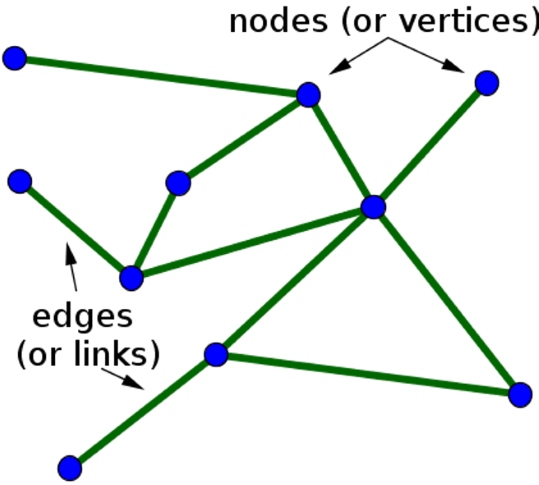




## Example to illustrate the definition
> 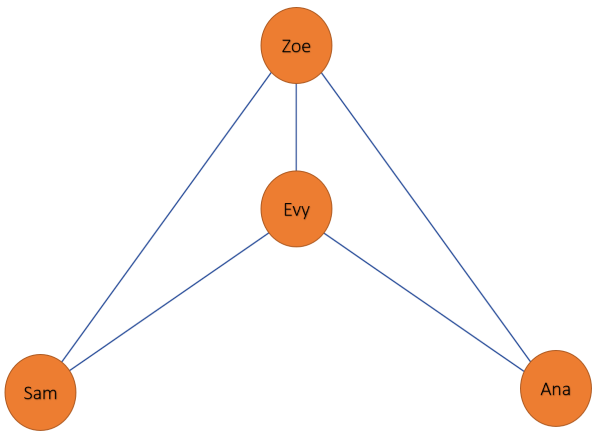


**Nodes**
*   𝑉 ={Zoe, Sam, Evy, Ana}

**Edges**

*   𝐸 ={{Zoe, Sam}, {Zoe, Ana}, {Zoe, Evy},
{Sam, Evy}, {Evy, Ana}}

* 𝐸 ={Zoe ⟷ Sam, Zoe ⟷ Ana, Zoe ⟷ Evy,
Sam ⟷ Evy, Evy ⟷ Ana}



## Network Visualization Goals

> 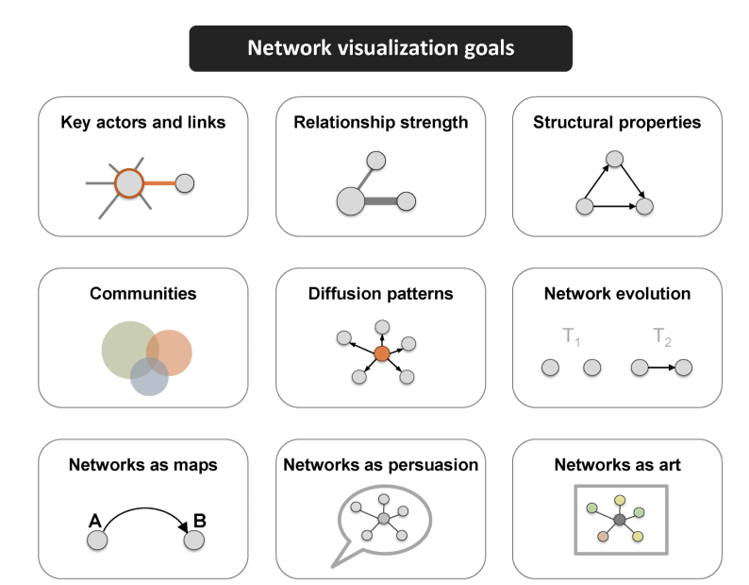

## Network Visualization Controls
> 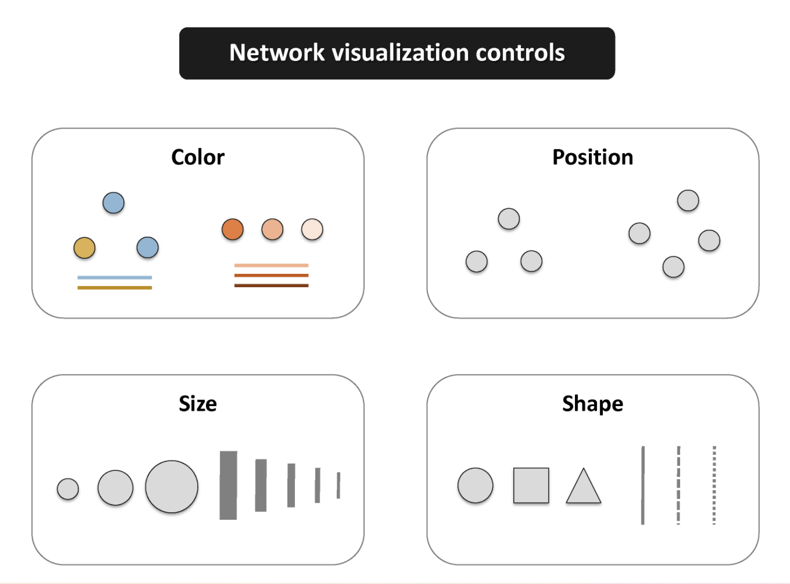

# **2 CREATING GRAPH**

## Install library

In [ ]:
#Install Library
install.packages("igraph")
install.packages("readxl")

In [ ]:
#call Library
library(igraph)

In [3]:
# load this library to use the read_excel() function,
# which can read in xlsx files
library(readxl)

## Import the data

In [5]:
# load Excel sheet
data <- read.csv("/content/Data1.csv")

In [ ]:
#view the data
data

In [ ]:
#check the structure of data
str(data)

## Calculate the returns

In [8]:
# define a function to find the log returns of closing prices
logreturnf <- function(x) {
  diff(log(x))
}


In [9]:
# remove "Date" column
data <- data[2:ncol(data)]

In [ ]:
# compute log returns
data_returns <- sapply(data, logreturnf)
data_returns

## Calculate the correlation

In [ ]:

# this is a Pearson correlation
data_correlation <- cor(data_returns)
data_correlation

In [ ]:
#declare as matrix
data_correlation1=as.matrix(data_correlation)
data_correlation1

### Plot the correlation

In [14]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(corrplot)

corrplot 0.92 loaded



In [ ]:
corrplot(data_correlation1, method="circle")

In [ ]:
corrplot(data_correlation1, type="lower")

Additional info: http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram

## Calculate the distance matrix

In [ ]:
euclidean_dist=sqrt(2*(1-data_correlation1))
euclidean_dist

### Calculate the graph adjacency

In [ ]:
g_adja= graph_from_adjacency_matrix(euclidean_dist, mode = "undirected",weighted =TRUE)
g_adja

Additional info: https://r-graph-gallery.com/257-input-formats-for-network-charts.html

## Plot the network

In [26]:
# Compute minimum spanning tree
mst <- minimum.spanning.tree(g_adja)

In [ ]:
mst

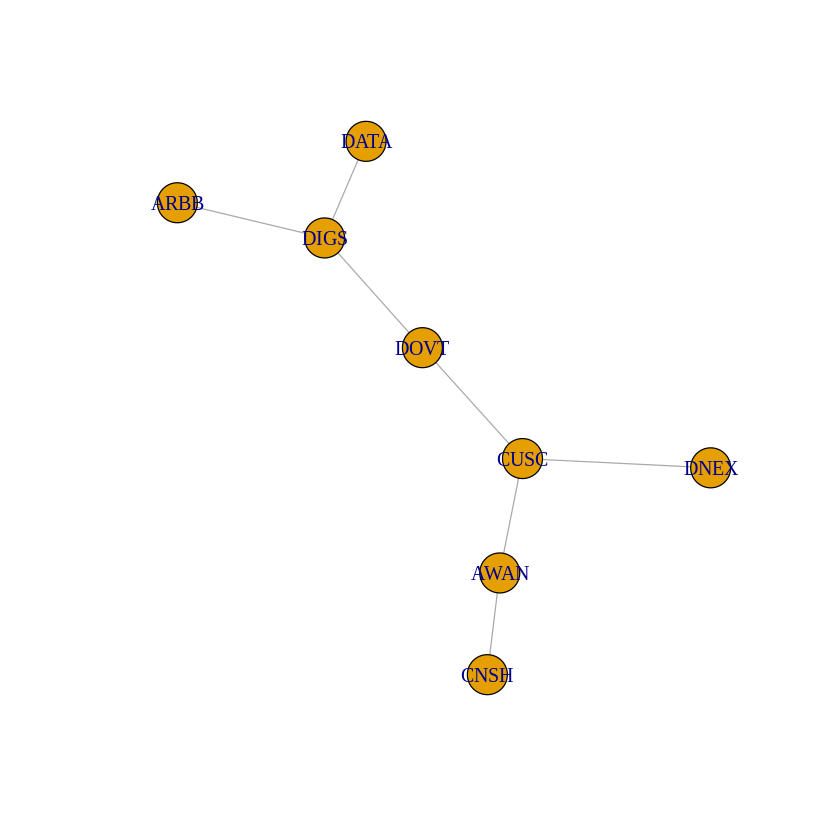

In [28]:
plot(mst)

### Extract the edges

In [ ]:
# Convert minimum spanning tree to graph object
mst_graph <- as.undirected(mst)
mst_graph

In [ ]:
# Extract the edges from the minimum spanning tree
edges <- get.edgelist(mst_graph)
edges

In [ ]:
# Convert the edges data into a data frame
edges_df <- data.frame(from = edges[, 1], to = edges[, 2])
edges_df

### Beautify the network

In [ ]:
# Let's change the layout
plot(mst, layout=layout.kamada.kawai(mst))

In [ ]:
# Let's change the color of nodes
plot(mst, layout=layout.kamada.kawai(mst),vertex.color="chartreuse")

In [ ]:
# Let's change the size of nodes
plot(mst, layout=layout.kamada.kawai(mst),vertex.color="chartreuse",vertex.size=20)

In [ ]:
# Let's change the edge color
plot(mst, layout=layout.kamada.kawai(mst),vertex.color="chartreuse",vertex.size=20,edge.color="black")

In [ ]:
# Let's change the edge width
plot(mst, layout=layout.kamada.kawai(mst),vertex.color="chartreuse",vertex.size=20,edge.color="black", edge.width = 2)

There are many arguments that you can insert in the plot() function to beautify your network visualisations. Some basic arguments are listed in the table below.

|Argument|Description|
|----------                |:-------------|
|edge.width|Adjust the thickness of the edges. The edge width defaults to 1. We can set the edges to have a thickness that represents a numeric edge attribute. This way the edges are weighted. |
|edge.curved|Adjust the curvature of the edges. The value can range from 0-1 with 0 being a straight line (no curve).|
|edge.color|Adjust the colour of the edges.|
|vertex.color|Adjust the colour of the nodes.|
|vertex.size|Adjust the size of the nodes. The default node size is 15.|
|vertex.label.cex|Adjust the size of the node fonts.|
|vertex.label.color|Adjust the colour of the node fonts.|
|edge.arrow.size|Adjust the size of the arrow heads. The default size is 1.|

Try out all the arguments above with different values to beautify your plots! It usually requires trial and error for you to obtain a visualisation that suits your needs.

Layout
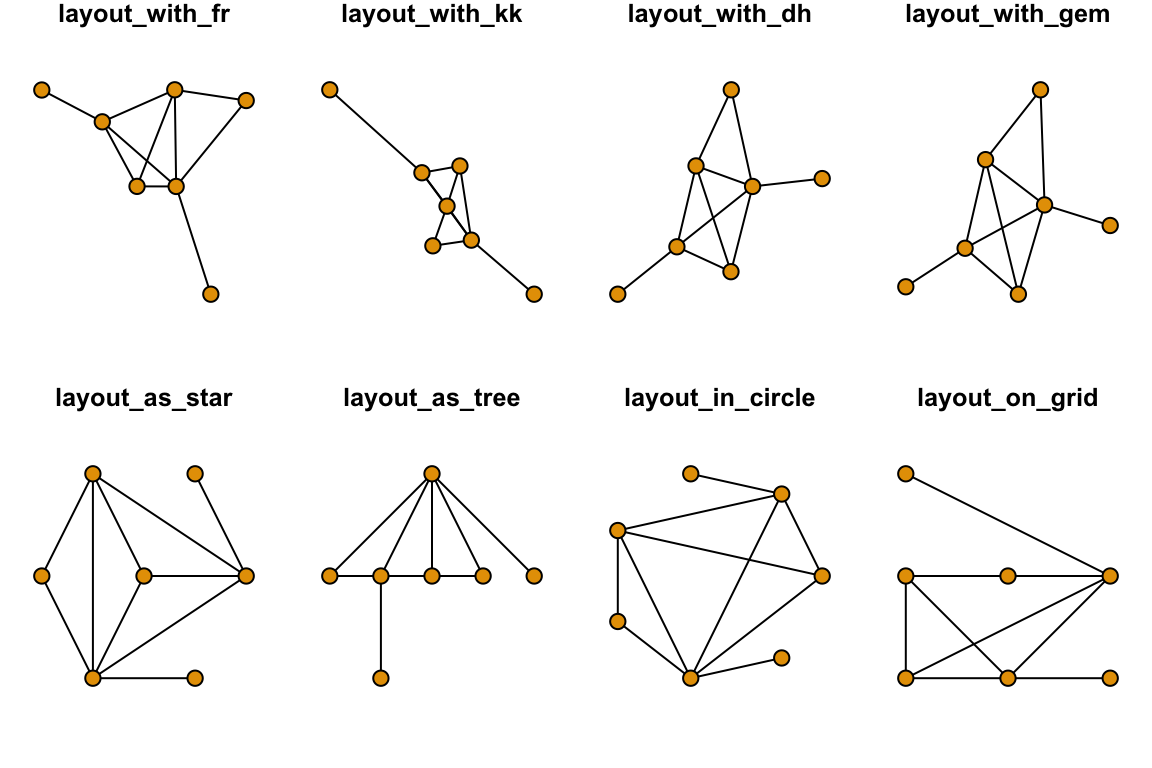


Additional info

Further details: https://r-graph-gallery.com/248-igraph-plotting-parameters.html

R Color: https://r-charts.com/colors/

## Centrality measures

### Degree centrality

Degree centrality measures the importance of nodes in a network based on the number of edges connected to a node. More influential nodes have more edges connected to them. All connections are rendered equal by degree centrality.

In [ ]:
#Calculate the degree centrality
deg1=degree(mst_graph)
deg1

In [ ]:
#Construct a dataframe
deg1_df=data.frame(deg1)
deg1_df

In [ ]:
##Plot the network, the sixe of node depends on degree centrality
plot(mst, layout=layout.kamada.kawai(mst),vertex.color="chartreuse",vertex.size=10*deg1,edge.color="black", edge.width = 2)

### Betweenness Centrality

Betweenness centrality **measures the extent to which a node lies on paths between other nodes**. Nodes that are considered influential according to betweenness centrality have the ability to **control information flow** in a network since they act as intermediaries. Without these high betweenness nodes, communication between other nodes in the network will be significantly disrupted.

In [ ]:
#Calculate betweeness
bet=betweenness(mst_graph,normalized = TRUE)
bet

In [ ]:
#Construct a dataframe
bet1_df=data.frame(bet)
bet1_df

## How to save output: table

In [55]:
#For example, save the degree centrality table
write.csv(deg1_df, file='degree_before.csv')

#REFERENCES


1.   Ognyanova, K. (2016, January). Network Analysis and Visualization with R and igraph. In NetSciX 2016 School of Code Workshop, https://kateto. net/netscix2016. html.

2.   Luke, D. A. (2015). A user's guide to network analysis in R (Vol. 72, No. 10.1007, pp. 978-3). New York: Springer.

3.   McNulty, K. (2022). Handbook of graphs and networks in people analytics: with examples in R and python. CRC Press.

